# Laboratorio de regresión - 5


<table style="width: 70%; margin: 20px auto; border-collapse: collapse; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2);">
  <thead>
    <tr style="background: linear-gradient(90deg, #0F2027, #203A43, #2C5364); color: #ffffff; text-transform: uppercase;">
      <th style="padding: 12px 20px; border: 1px solid #ddd;">Nombre del Alumno</th>
      <th style="padding: 12px 20px; border: 1px solid #ddd;">Expediente</th>
      <th style="padding: 12px 20px; border: 1px solid #ddd;">Fecha</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 12px 20px; border: 1px solid #ddd; text-align: center;">Christopher Jacob Ahumada Robles</td>
      <td style="padding: 12px 20px; border: 1px solid #ddd; text-align: center;">748077</td>
      <td style="padding: 12px 20px; border: 1px solid #ddd; text-align: center;">13/02/2025</td>
    </tr>
  </tbody>
</table>
   |

## Validación

Hemos estado usando `train_test_split` en nuestros modelos anteriores.

¿Por qué?

Para tener subconjuntos de nuestro dataset original los cuales divididos en parametros train y test podemos obtener muestreos para poder hacer comparaciones de las predicciones de nuestro modelo con los datos de salida reales y tener la facilidad de evaluarlo, prevenir el overfitting y respaldarnos con validaciones de hiperparametros.

Si la muestra es un subset de la población y queremos generalizar sobre la población, ¿no sería mejor utilizar todos los datos al entrenar un modelo?

No, no sin antes evaluar y tener certeza del rendimiento del modelo con hiperparametros

El propósito de volver a muestrear dentro de nuestro dataset es tener una idea de qué tan buena podría ser la generalización de nuestro modelo. Imagina un dataset ya separado en dos mitades. Utilizas la primera mitad para entrenar el modelo y pruebas en la segunda mitad; la segunda mitad eran datos invisibles para el modelo al momento de entrenar. Esto nos lleva a tres escenario típicos:

1. Si el modelo hace buenas predicciones en la segunda mitad, significa que la primera mitad era "suficiente" para generalizar.
2. Si el modelo no hace buenas predicciones en la segunda mitad, pero sí en la primera mitad, podría ser que había información importante en la segunda mitad que debió haber sido tomada en cuenta al entrenar, o un problema de overfitting.
3. Si el modelo no hace buenas predicciones en la segunda mitad, y tampoco en la primera mitad, se tendrían que revisar los factores y/o el modelo seleccionado.

El caso ideal sería el 1, pero por estadística los errores y varianzas tienen como entrada el número de muestas, por lo que tenemos menos seguridad de nuestros resutados al usar menos muestras. Si vemos que el modelo generaliza bien podemos unir de nuevo el dataset y entrenar sobre el dataset completo.

En el caso 2 está el problema de que no podemos saber qué información es necesaria para el entrenamiento apropiado del modelo; esto nos lleva a pensar que debemos usar el dataset completo para entrenar, pero esto nos lleva al mismo problema de no saber si el modelo puede generalizar.

El problema sólo incrementa si se tienen hiperparámetros en el modelo (e.g. $\lambda$ en regularización).

## Leave-One-Out Cross Validation

Este método de validación es una colección de $n$ `train-test-split`. Teniendo un dataset de $n$ muestras, la lógica es:
1. Saca una muestra del dataset.
2. Entrena tu modelo con las $n-1$ muestras.
3. Evalúa tu modelo en la muestra que quedó fuera con el métrico que más se ajuste a la aplicación.
4. Regresa la muestra al dataset.
5. Repite 1-4 con muestras diferentes hasta haber hecho el procedimiento $n$ veces para $n$ muestras.
6. Calcula la media y desviación estándar de los métricos guardados.

Con los resultados del proceso de validación podemos saber qué tan bueno podría ser el modelo seleccionado con los datos (con/sin transformaciones).

### Ejercicio 1

Utiliza el dataset `Motor Trend Car Road Tests`. Elimina la columna `model` y entrena 32 modelos diferentes utilizando Leave-One-Out Cross Validation con target `mpg`. Utiliza MSE como métrico.

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error

In [58]:
df=pd.read_excel("Motor Trend Car Road Tests (1).xlsx").dropna()
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [60]:
df = df.drop('model', axis=1)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [62]:

y = df["mpg"].values.reshape(-1, 1)

X = df.drop(columns="mpg").values


In [64]:
X.shape

(32, 10)

In [66]:
X_train.shape

(31, 10)

In [68]:
y_train.shape

(31, 1)

In [70]:
y.shape

(32, 1)

In [78]:
X_test.shape

(1, 10)

In [80]:
y_test.shape

(1, 1)

<Axes: title={'center': 'mse Leave-One-Out'}>

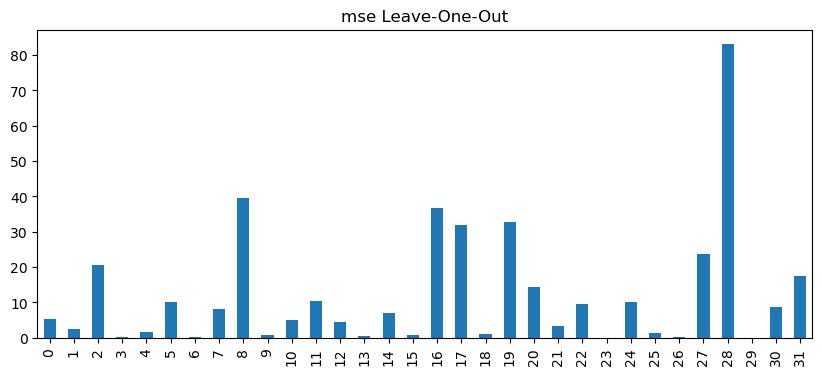

In [86]:
n = len(y)
model=LinearRegression()
scores=[]
for i in range(n):
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    
    X_test = X[i].reshape(1, -1)
    y_test = y[i].reshape(-1, 1)  
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)
    
    scores.append(mse)

scores_series = pd.Series(scores, name="mse por muestra")
scores_series.plot(kind="bar", figsize=(10, 4), title="mse Leave-One-Out")

In [92]:
np.mean(scores),np.std(scores)

(12.181558006901945, 17.067399871888522)

Interpreta.

Necesitamos analizar el experimento 28 ya que puede tener datos atipicos, o escalar los datos para poder tener mayor comparativa

## K-Folds Cross-Validation

El dataset `Motor Trend Car Road Tests` sólo tiene 32 muestras, y utilizar un modelo sencillo de regresión múltiple hace que usar LOOCV sea muy rápido. El dataset `California Housing` tiene $20640$ muestras para $9$ columnas, entonces realizar un ajuste sobre una transformación o sobre el modelo y luego calcular el impacto esperado podría tomar más tiempo.

La solución propuesta es dividir el dataset en *k* folds (partes iguales), ajustar en *k-1* folds y probar en el restante.

### Ejercicio 2
Utiliza el dataset `California Housing` y haz K-folds Cross Validation con 10 folds. Utiliza el MSE como métrico.

In [119]:
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
print("Dataset Shape:", housing.data.shape, housing.target.shape)
print("Dataset Features:", housing.feature_names)
print("Dataset Target:", housing.target_names)
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target


X, y = shuffle(X, y, random_state=2)


Dataset Shape: (20640, 8) (20640,)
Dataset Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset Target: ['MedHouseVal']


In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

numerical_features = X.columns
numerical_transformer = StandardScaler()
preprocessor=ColumnTransformer(
    transformers=[
        ("num",numerical_transformer,numerical_features)
    ])
model=LinearRegression()
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [127]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv=10
scores = cross_val_score(pipeline, X, y, cv=cv)
print("CV scores:", scores)
print("Mean CV score:", np.mean(scores))

CV scores: [0.59451264 0.61229299 0.60607148 0.60870786 0.61449819 0.61520972
 0.6071381  0.63005891 0.59830002 0.53619255]
Mean CV score: 0.6022982465199096


Interpreta.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3